In [8]:
import os
import requests
import pandas as pd
import io
import researchpy as rp

In [ ]:
csv_file_path = '/Users/mac/Desktop/Code_Smell_Detection/dataset/MLCQCodeSmellSamples.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)
filtered_df = df[df['smell'] == 'feature envy']
filtered_df.to_csv('/Users/mac/Desktop/Code_Smell_Detection/dataset/feature_envy/filtered_dataset_feature_envy.csv', index=False)
num_rows = filtered_df.shape[0]  
print(f"Number of rows in the filtered dataset: {num_rows}")
print("Filtered CSV has been saved as 'filtered_dataset_feature_envy.csv'")

Number of rows in the filtered dataset: 3337
Filtered CSV has been saved as 'filtered_dataset_feature_envy.csv'


In [3]:
def convert_to_raw_url(blob_url):
    if 'github.com' in blob_url and '/blob/' in blob_url:
        raw_url = blob_url.replace('github.com', 'raw.githubusercontent.com').replace('/blob/', '/')
        raw_url = raw_url.split('/#')[0]  
        return raw_url
    else:
        raise ValueError(f"Invalid GitHub blob URL: {blob_url}")

In [ ]:
def download_and_extract_lines(raw_url, start_line, end_line, save_path):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(raw_url, headers=headers, allow_redirects=True, timeout=10)
        response.raise_for_status()  

        print(f"Downloading from: {raw_url}")
        print(f"Extracting lines {start_line} to {end_line}")
        if 'text/plain' not in response.headers.get('Content-Type', ''):
            print(f"Unexpected content type: {response.headers.get('Content-Type')}")
            print(f"Response preview: {response.text[:500]}")
            return False

        file_content = response.text.splitlines() 

        if start_line < 1 or end_line > len(file_content) or start_line > end_line:
            raise ValueError(
                f"Invalid start_line ({start_line}) or end_line ({end_line}) for file: {raw_url}"
            )

        extracted_lines = file_content[start_line - 1:end_line]

        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        with open(save_path, 'w', encoding='utf-8') as file:
            file.write('\n'.join(extracted_lines))
        print(f"Downloaded and extracted lines {start_line}-{end_line}: {raw_url} -> {save_path}")
        return True

    except requests.exceptions.RequestException as e:
        print(f"HTTP error while accessing {file_url}: {e}")
    except ValueError as ve:
        print(f"Value error: {ve}")
    except Exception as e:
        print(f"Unexpected error: {e}")
    return False

In [ ]:
dataset_path = "/Users/mac/Desktop/Code_Smell_Detection/dataset/feature_envy/features"
csv_file_path = '/Users/mac/Desktop/Code_Smell_Detection/dataset/feature_envy/filtered_dataset_feature_envy.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)
filtered_df = df[df['smell'] == 'feature envy']
os.makedirs(dataset_path, exist_ok=True)

ids = []
severity = []
classes = []

for _, row in filtered_df.iterrows():
    try:
        file_url = row['link']
        raw_url = convert_to_raw_url(file_url)
        file_id = row['id']
        severity_level = row['severity']
        start_line = row['start_line']
        end_line = row['end_line']
        print(file_url)
        print(raw_url)
    
        severity_folder = os.path.join(dataset_path, severity_level)
        os.makedirs(severity_folder, exist_ok=True)
        file_name = f"{file_id}.txt"  # Saving as ID with .txt extension
        file_path = os.path.join(severity_folder, file_name)
        download_and_extract_lines(raw_url, start_line, end_line, file_path)

        if os.path.exists(file_path):
            ids.append(file_id)
            severity.append(severity_level)
            with open(file_path, "r", encoding="ISO-8859-1") as file:
                classes.append(file.read())
        else:
            print(f"File not found for ID {file_id} at {file_path}")

    except Exception as e:
        print(f"Error processing row with ID {row['id']}: {e}")


https://github.com/apache/syncope/blob/114c412afbfba24ffb4fbc804e5308a823a16a78/client/idrepo/ui/src/main/java/org/apache/syncope/client/ui/commons/ConnIdSpecialName.java/#L35-L37
https://raw.githubusercontent.com/apache/syncope/114c412afbfba24ffb4fbc804e5308a823a16a78/client/idrepo/ui/src/main/java/org/apache/syncope/client/ui/commons/ConnIdSpecialName.java
Extracting lines 35 to 37
Downloaded and extracted lines 35-37: https://raw.githubusercontent.com/apache/syncope/114c412afbfba24ffb4fbc804e5308a823a16a78/client/idrepo/ui/src/main/java/org/apache/syncope/client/ui/commons/ConnIdSpecialName.java -> /Users/mac/Desktop/Code_Smell_Detection/dataset/feature_envy/features/none/526.txt
https://github.com/apache/tika/blob/4131c6e30f2e0eb1feb85e0f7576531d4e830468/tika-parsers/src/main/java/org/apache/tika/parser/ocr/TesseractOCRConfig.java/#L531-L534
https://raw.githubusercontent.com/apache/tika/4131c6e30f2e0eb1feb85e0f7576531d4e830468/tika-parsers/src/main/java/org/apache/tika/parser/ocr/T

In [9]:
dataset_path = "/Users/mac/Desktop/Code_Smell_Detection/dataset/feature_envy/features"
ids = []
severity = []
classes = []
for subdir, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.txt'):
            file_path = os.path.join(subdir, file)
            text = io.open(file_path, "r", encoding="ISO-8859-1").readlines()
            ids.append(file.split('.')[0])
            classes.append(''.join(text))
            if subdir.endswith('none'):
                severity.append('none')
            elif subdir.endswith('major'):
                severity.append('major')
            elif subdir.endswith('minor'):
                severity.append('minor')
            elif subdir.endswith('critical'):
                severity.append('critical')

In [10]:
data_dict = {'sample_id': ids, 'severity': severity, 'method': classes} 
df = pd.DataFrame(data_dict)
df['sample_id'] = df['sample_id'].astype('int')
print(df.shape[0])
df.head()

3027


,sample_id,severity,method
0,12150,critical,public SystemDiagnosticsDTO createSystemDi...
1,10168,critical,protected void addRequiredAlertProperties(Se...
2,12783,critical,"@SuppressWarnings(""try"")\n private void..."
3,12754,critical,public void validateDepositDetailForUpdate...
4,4277,critical,@Override\n public ListenableFuture<Voi...


In [11]:
rp.summary_cat(df["severity"])

,Variable,Outcome,Count,Percent
0,severity,none,2616,86.42
1,,minor,260,8.59
2,,major,127,4.20
3,,critical,24,0.79


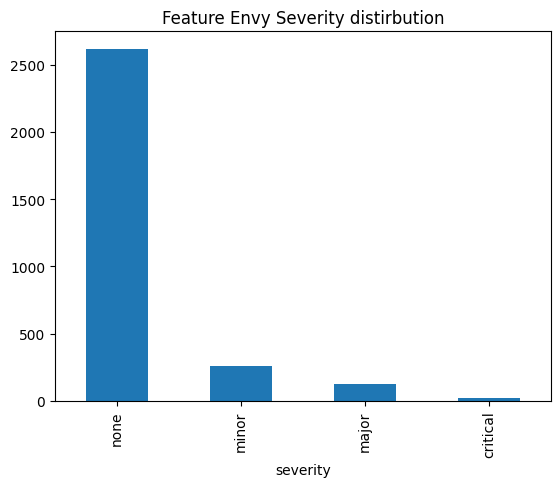

In [12]:
import matplotlib.pyplot as plt
df.severity.value_counts().plot(kind='bar')
plt.title("Feature Envy Severity distirbution")
plt.show()


In [ ]:
df = df[df['method'] != '']
df.to_csv('/Users/mac/Desktop/Code_Smell_Detection/dataset/feature_envy/feature_envy.csv', index=False)
df.shape

(3027, 3)